MPSI3 - Informatique commune - 2ème semestre

# TP2 CORRIGE Méthode de Newton


L'objectif de ce TP est d'employer la méthode de Newton afin de déterminer les solutions à l'équation $f(x)=0$. Pour cela nous utiliserons les bibliothèques suivantes : 
* **`numpy`** : pour générer des tableaux de données homogènes et faire du calcul numérique ;
* **`matplotlib.pyplot`** : pour réaliser des représentations graphiques (`pyplot` est un sous-module de la bibliothèque `matplotlib`).
* **`scipy.optimize`** : pour utiliser des fonctions de recherche de zéro issues du sous-module `optimize` de la bibliothèque `scipy` :

Pour importer la bibliotèque **`scipy`** et son sous-module : 
* **`import scipy.optimize as opt`**  avec `opt` comme alias.

In [1]:
%pylab inline

from math import *

Populating the interactive namespace from numpy and matplotlib


## Fonction de recherche de zero de Scipy


**Question :** 
1. Chercher la solution positive à l'équation $x^2=2$ en utilisant la fonction **opt.newton**. Utiliser la fonction en présicant la fonction dérivée et sans la préciser (penser aux fonctions définies par le mot clef `lambda`).

    Exemple de syntaxe pour définir la **fonction lambda** correspondant à $x \to 5~x$ :
    ```python
    lambda x : 5 * x```

2. Quel est l'algorithme utilisé lorsque la fonction dérivée n'est pas transmise ?


In [2]:
import scipy.optimize as opt
## A COMPLETER

### Méthode de Newton : ### 

# en une seule ligne : 

print("Avec dérivée :",opt.newton(lambda x : x**2-2,1,lambda x : 2*x))

# ou de manière moins synthétique : 

f = lambda x : x**2-2
g = lambda x : 2*x
print("Avec dérivée :",opt.newton(f,1,g))

### Méthode de la sécante : ###

print("Sans dérivée :",opt.newton(lambda x : x**2-2,1))


Avec dérivée : 1.4142135623730951
Avec dérivée : 1.4142135623730951
Sans dérivée : 1.4142135623730947


## A. Mes fonctions Newton
### A.1 Ma fonction newton avec dérivée connue
L'objectif de cette partie est de créer votre propre fonction `newton1` mettant en oeuvre la méthode de Newton.

Noter que cette fonction doit comprendre une précision sur $x_k$ par défaut et un nombre maximal d'itérations par défaut. Elle doit aussi gérer correctement le cas d'une dérivée "nulle" : $|f'(x_k)|<\varepsilon$.

Pour cela, nous allons procéder par étapes :
1. créer une fonction `mon_newton0k` qui prend fin au bout de $k_{max}$ itérations ;
2. créer une fonction `mon_newton0e` qui prend fin lorsqu'on a atteint la précision voulue sur $x_k$ tout en limitant le nombre d'itérations à $k_{max}$ ;
3. créer la fonction `mon_newton1` complète voulue.

A la fin de chaque programmation, vous testerez votre fonction `newton` avec la cellule suivante qui réalise de nouveau le calcul du zéro de $x^2-2$.


In [2]:
def mon_newton0k(f, x0, fp, kmax):
    """Retourne la valeur x obtenue après kmax itérations de la méthode de Newton.
    Pour des valeurs de kmax suffisamment grandes, x doit être proche de xf telle que f(xf)=0.
    fp(x) retourne la dérivée de f en x.
    La valeur initiale est x0."""
    # A COMPLETER
    
    x = x0
    
    for k in range(kmax):
        x = x - f(x) / fp(x)
    return x

In [3]:
## test de la fonction mon_newton : 
mon_newton0k(lambda x:x**2-2, 4, lambda x:2*x, 3)

1.4218903638151426

In [4]:
def mon_newton0e(f, x0, fp, e, kmax):
    """Retourne une valeur x telle que f(x)=0 avec une précision e sur x.
    fp(x) retourne la dérivée de f en x.
    La valeur initiale est x0.
    kmax est le nombre d'itérations maximum (sécurité contre boucle infinie).
    Affiche la valeur de x recherchée ainsi que le nombre d'itérations."""
    # A COMPLETER

    x = x0
    k = 0
    dx = f(x) / fp(x)     # dx = x(k) - x(k+1)
    
    while abs(dx) > e and k < kmax :
        x = x - dx
        dx = f(x) / fp(x)
        k = k + 1
    print("Nombre d'itérations :", k)
    return x

In [5]:
## test de la fonction mon_newton : 
mon_newton0e(lambda x:x**2-2, 4, lambda x:2*x, 1e-8, 50)

Nombre d'itérations : 5


1.4142135625249321

In [6]:
def mon_newton1(f, x0, fp, e=1e-8, e2=1e-6, kmax=50):
    """Retourne une valeur x telle que f(x)=0 avec une précision e sur x.
    fp(x) retourne la dérivée de f en x.
    La valeur initiale est x0.
    kmax est le nombre d'itérations maximum.
    S'il est atteint ou si une dérivée quasi nulle est trouvée (abs(fp(x)) < e2),
    la fonction retourne 'ERREUR kmax' ou 'ERREUR dérivée'.
    Si tout va bien, mon_newton1 affiche la valeur de x recherchée."""
    # A COMPLETER
    
    x = x0
    k = 0
    dx = f(x) / fp(x)     # dx = x(k) - x(k+1)
    
    while abs(dx) > e and k < kmax :
        if abs(fp(x)) < e2 :
            return print('ERREUR dérivée')   # return sort de la fonction 'mon_newton'
        else :
            x = x - dx
            dx = f(x) / fp(x)
            k = k + 1
        if k == kmax :
            return print('ERREUR kmax')
    print("Nombre d'itérations :", k)
    return x

In [7]:
## test de la fonction mon_newton : 
mon_newton1(lambda x:x**2-2, 0.5, lambda x:2*x)

Nombre d'itérations : 5


1.4142135625249321

### Principe d'utilisation de la méthode de Newton :

La **méthode de Newton** nécessite d'avoir une idée de la solution pour définir la valeur initiale, indispensable s'il existe plusieurs solutions.
De ce fait, son utilisation usuelle consiste à :
1. **tracer** graphiquement la fonction,
2. utiliser la **méthode de Newton** à partir d'un point initial défini par l'étude graphique,
3. **ajouter la ou les solutions** sur le graphique pour vérification.

Cette démarche sera à effectuer de façon quasi-systématique dans les exemples suivants.


### Exemple d'utilisation : dégradation d'une boisson dans l'organisme

La cinétique de dégradation d'une boisson alcoolisée dans l’organisme donne une évolution temporelle de sa concentration dans le sang régie par l'équation :

$C_2(t)=\frac{V_1}{V_2}C_{01} (1-e^{-k_1 t})-k_2 t$ en mol/L, $t$ en min,

avec :

- $C_{01}=0,90$ mol/L, concentration initiale dans l'estomac,
- $V_1=1,0$ L, le volume de boisson absorbé,
- $V_2=40$ L, le volume total de liquide et de sang dans le corps humain,
- $k_1=0,17$ /min, la constante de vitesse caractéristique de la 1ère phase,
- $k_2=71 \times 10^{-6}$ mol/L/min, la constante de vitesse caractéristique de la 2ème phase.

On rappelle qu'en France, une personne ne peut conduire que si le taux d’alcool dans son sang ne dépasse pas $C_{2max}=0,50$ g/L $=0,011$ mol/L.

** A faire :**

** Exécuter** puis **compléter** le script suivant afin de déterminer le temps au bout duquel une personne est apte à conduire, en utilisant votre fonction `mon_newton1`, et afficher un point sur le graphe pour indiquer votre résultat.

Nombre d'itérations : 2
Temps limite : 161.9718309855669


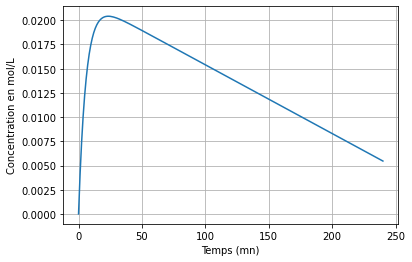

In [15]:
C1 = 0.9
V1, V2 = 1., 40.
k1, k2 = 0.17, 71e-6
C2max = 0.011

def C2(t):
    return C1 * V1 / V2 * (1 - np.exp(-k1 * t)) - k2 * t

t = np.linspace(0,240,201)
plt.plot(t,C2(t))
#plt.plot([0,240],[C2max,C2max])
plt.grid(True)

## A COMPLETER
T = mon_newton1(lambda x : C2(x)-C2max, 60, lambda x : V1/V2*C1*k1*exp(-k1*x)-k2)
print ("Temps limite :",T)
#plot(T, C2(T), 'o')
plt.xlabel("Temps (mn)")
plt.ylabel("Concentration en mol/L")
plt.savefig("concentration.png", dpi=75)

### A.2 Ma méthode de Newton avec calcul de la dérivée
Après avoir recopié (par copier-coller) le code de votre fonction `mon_newton1`, définir une nouvelle fonction `mon_newton2` estimant la dérivée par différence finie centrée en utilisant un pas $h$ ($10^{-6}$ par défaut). **Cf. le mémento du TP n°2**.

Cette fonction ne nécessite donc pas le passage en argument de la fonction dérivée.

Tester cette fonction avec l'exemple précédent. 


In [10]:
def mon_newton2(f, x0, h=1e-6, e=1e-8, e2=1e-6, kmax=50):
    """Retourne une valeur x telle que f(x)=0 avec une précision e sur x.
    La dérivée est estimée par différence finie centrée avec un pas h.
    La valeur initiale est x0.
    kmax est le nombre d'itérations maximum.
    S'il est atteint ou si une dérivée quasi nulle est trouvée (abs(fp(x)) < e2),
    la fonction retourne 'ERREUR kmax' ou 'ERREUR dérivée'.
    Si tout va bien, mon_newton affiche la valeur de x recherchée."""
    # A COMPLETER

    
    x = x0
    k = 0
    fp = (f(x+h)-f(x-h)) / (2*h)
    dx = f(x) / fp                        # dx = x(k) - x(k+1)
    
    while abs(dx) > e and k < kmax :
        if abs(fp) < e2 :
            return print('ERREUR dérivée')   # return sort de la fonction 'mon_newton'
        else :
            x = x - dx
            fp = (f(x+h)-f(x-h))/(2*h)
            dx = f(x) / fp
            k = k + 1
        if k == kmax :
            return print('ERREUR kmax')
    print("Nombre d'itérations :", k)
    return x   

# test
print(mon_newton2(lambda x:C2(x) - C2max, 60))

Nombre d'itérations : 2
161.971830984


### Exemple d'utilisation : fréquences de résonance d'une pale d'hélicoptère

Lorsqu'un hélicoptère est en marche posé au sol, il peut apparaître un phénomène dangereux baptisé "résonance-sol".
Ce phénomène peut détériorer voire détruire l'appareil en quelques secondes en raison des vibrations de grandes amplitudes de certains éléments qui rentrent en résonance. Heureusement, il existe des techniques de conception sur les hélicoptères modernes pour éviter cet effet.

Un modèle très simplifié d'une pale d'hélicoptère est celui d'une poutre encastrée à l'une de ses extrémités au rotor et libre de l'autre. En régime libre, la pale oscille à sa fréquence propre. Mais soumise à une excitation sinusoïdale, cette pale pourra entrer en résonance pour certaines fréquences. On parle dans ce cas des modes propres de la pale. 

Représentation des premiers modes propres de la pale : 
<img src="ModesPropres.png" style="width: 400px;"> 

Une étude mécanique permet de montrer que les fréquences de résonance $f$ sont liées aux racines $x$ de l'équation :  $cosh(x) \times cos(x)+1=0$, telles que $x^4 = 4\pi^2f^2\dfrac{mL^3}{E I}$. On précise que :

- $m = 84$ kg la masse de la pale,
- $L = 4$ m la longueur de la pale,
- $E = 80$ GPa le module d’élasticité du matériau de la pale (1 GPa = $10^9$ Pa),
- $I = 1.562 \times 10^{-6}$ m$^4$ le moment quadratique de la section de la pale.

**A faire :**

**Exécuter** le script suivant qui tracera la courbe $cosh(x) \times cos(x)+1$ en fonction de $x$.

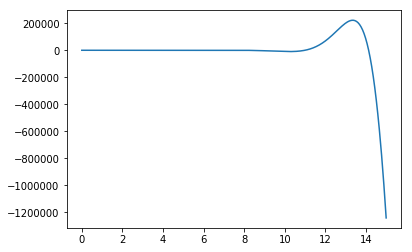

In [11]:
x = np.linspace(0, 15, 401)
plt.plot(x, np.cosh(x) * np.cos(x) + 1)

Sur le tracé de la fonction $f(x) = cosh(x) \times cos(x)+1$ on constate qu'il est difficile d'estimer le nombre (et la valeur) des racines $x_i$ dans l'intervalle demandé. La fonction étudiée sera donc : $g(x)=cos(x)+\frac{1}{cosh(x)}$

**A faire :**

1. **Exécuter** le script suivant qui tracera les courbes voulues.
2. Est-ce que les zéros de cette fonction sont identiques à ceux recherchés ?

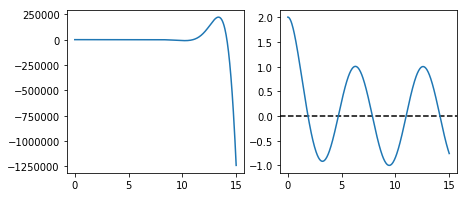

In [12]:
plt.figure(figsize=(7,3))
x = np.linspace(0, 15, 401)
plt.subplot(121)
plt.plot(x, np.cosh(x) * np.cos(x) + 1)
plt.subplot(122)
plt.axhline(0, color='k', linestyle='--')
plt.plot(x, np.cos(x) + 1 / np.cosh(x))

**A faire :**

1. Déterminer les 3 premières fréquences de résonance en complétant le script suivant et en utilisant votre fonction `mon_newton2`.
2. Mettre un point correspondant aux solutions $x_i$ sur la courbe.

Nombre d'itérations : 3
Premier mode : 2.698337445474444 Hz
Nombre d'itérations : 4
Deuxième mode : 16.910192128457908 Hz
Nombre d'itérations : 4
Troisième mode : 47.34902761254413 Hz


([<matplotlib.lines.Line2D at 0x7f0e5359beb8>], None)

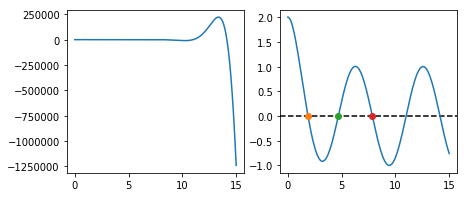

In [13]:
plt.figure(figsize=(7,3))
x = np.linspace(0, 15, 401)
plt.subplot(121)
plt.plot(x, np.cosh(x) * np.cos(x) + 1)
plt.subplot(122)
plt.axhline(0, color='k', linestyle='--')
plt.plot(x, np.cos(x) + 1 / np.cosh(x))

m=84
L=4
E=80e9
I=1.5625e-6

def f(x):
    """Retourne la fréquence de vibration pour un beta donné"""
    return (x**4 / 4 / pi**2 / m / L**3 * E * I)**0.5
## A COMPLETER

b1=mon_newton2(lambda v:cos(v)+1/cosh(v), 1)
plt.plot(b1,cos(b1)+1/cosh(b1),"o"), print("Premier mode :",f(b1),"Hz")

b2=mon_newton2(lambda v:cos(v)+1/cosh(v), 4)
plt.plot(b2,cos(b2)+1/cosh(b2),"o"), print("Deuxième mode :",f(b2),"Hz")

b3=mon_newton2(lambda v:cos(v)+1/cosh(v), 7)
plt.plot(b3,cos(b3)+1/cosh(b3),"o"), print("Troisième mode :",f(b3),"Hz")

## B. Positions d'équilibre d'un système masse-ressort (recherche d'extréma)

On considère un guide circulaire, de centre $O$, de rayon $R$, placé dans un plan vertical. On désigne par $B$ le point le plus bas du guide et par $C$ son point le plus haut. Sur ce guide est enfilée une perle assimilée à un point matériel $A$ de masse $m$. Cette perle glisse sans frottement sur le guide et on repère sa position par l’angle $\theta$ que fait $OA$ avec la verticale $Oz$. 
$A$ est accroché au bout d’un ressort idéal, de constante de raideur $k$, de longueur à vide $\ell_0$ lui-même fixé en $C$. 

<img src="SystemeRessort.png" style="width: 300px;"> 

Le référentiel d’étude, terrestre local, est supposé galiléen. On utilise le repérage polaire $(O,\vec{u}_r,\vec{u}_{\theta})$. L’accélération de la pesanteur, supposée uniforme, est notée $\vec{g}$. On donne :

- $R$ = 30 cm
- $m$ = 200 g
- $k$ = 100 N m$^{-1}$
- $\ell_0$ = 20 cm
- $g$ = 9,8 m s$^{-2}$

Les forces appliquées à la perle sont : le poids, la réaction du guide et la force de rappel du ressort. Les frottements étant négligés, la réaction ne travaille pas. Le poids et la force de rappel sont des forces conservatives.
L’énergie potentielle de la perle s’écrit : 
$$E_p = - m g R \cos(\theta) + k R^2 \cos(\theta) - 2 k R \ell_0 \cos(\theta/2)$$
 

Le script ci-dessous définit la fonction énergie potentielle et trace son allure entre $-\pi$ et $+\pi$.

Quels points correspondent aux positions d'équilibre ? Equilibres stables ou instables ?

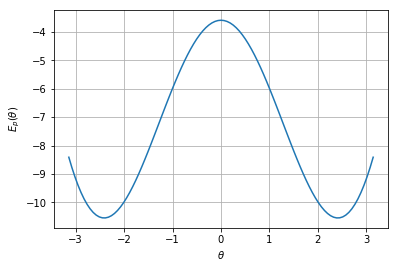

In [14]:
# initialisation
R=0.3
m=0.2
k=100.
l0=0.2
g=9.8

# Fonction énergie potentielle
def Ep(theta):
    """Calcul énergie potentielle"""
    return -m * g * R * np.cos(theta) + k * R * R * np.cos(theta) - 2 * k * R * l0 * np.cos(theta / 2)

theta = np.linspace(-pi, pi, 101);
plt.plot(theta, Ep(theta))
plt.xlabel(r"$\theta$")
plt.ylabel(r"$E_p(\theta)$")
plt.grid(True)

** A faire :**

1. Définir une fonction `dEp(x)` retournant la dérivée approchée de Ep(x) (**Cf. le mémento du TP n°2**),
* Définir une fonction `ddEp(x)` retournant la dérivée seconde approchée de Ep(x) sans utiliser la fonction `dEp(x)` (**Cf. le mémento du TP n°2**),
* Utiliser ces deux fonctions et la méthode de Newton pour déterminer les différentes positions d'équilibre. Indiquer le critère permettant de savoir s'il s'agit d'une solution stable ou non.

Nombre d'itérations : 4
-2.41226899508
Nombre d'itérations : 6
1.60612579559e-11
Nombre d'itérations : 4
2.41226899508


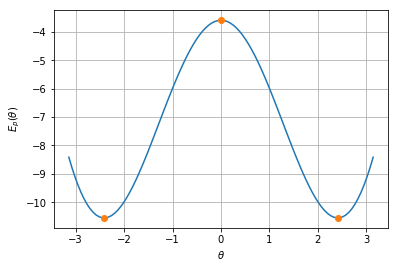

In [15]:
## A COMPLETER

h=1e-6

def dEp(x):
    return (Ep(x + h) - Ep(x - h)) / 2 / h

def ddEp(x):
    return (Ep(x + h) + Ep(x - h) - 2 * Ep(x)) / h**2

theta1=mon_newton1(dEp, -2, ddEp)
print (theta1)
theta2=mon_newton1(dEp, 1.5, ddEp)
print (theta2)
theta3=mon_newton1(dEp, 2, ddEp)
print (theta3)

theta=np.linspace(-pi, pi, 101);
plt.plot(theta, Ep(theta))
plt.xlabel(r"$\theta$")
plt.ylabel(r"$E_p(\theta)$")
plt.grid(True)
plt.plot([theta1,theta2,theta3], Ep(np.array([theta1,theta2,theta3])),'o')


In [16]:
# Critère de stabilité

def stabilite(x):
    if ddEp(x) > 0 :
        return print (x,"est une position d'équilibre stable")
    return print (x,"est une position d'équilibre instable")
        
stabilite(theta1)
stabilite(theta2)
stabilite(theta3)

-2.41226899508 est une position d'équilibre stable
1.60612579559e-11 est une position d'équilibre instable
2.41226899508 est une position d'équilibre stable


### Portrait de phase
*Les réponses aux questions sont données dans la cellule qui suit et sont à analyser.*

1. Définir les 2 fonctions suivantes de la vitesse angulaire :

    `ThetaP1`($\theta$, $E_m$) = $+ {1 \over R} \sqrt{{2 \over m}(E_m - E_p(\theta))}$
    et 
    `ThetaP2`($\theta$, $E_m$) = $- {1 \over R} \sqrt{{2 \over m}(E_m - E_p(\theta))}$

2. Tracer différentes trajectoires de phase pour différentes valeurs de l'énergie mécanique. Existe-t-il différents types de mouvement ?
3. Quelle est la valeur de l'énergie mécanique correspondant à la séparatrice ?
4. Ajouter un point vert pour les positions d'équilibre stable et un point rouge pour la position d'équilibre instable.

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


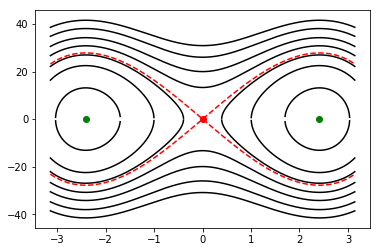

In [17]:
theta=np.linspace(-pi,pi,2000);
Em = [5, 2.5, -0, -2, -4, -6, -9]

ThetaP1 = lambda theta, em : np.sqrt(2 / m * (em - Ep(theta))) / R
ThetaP2 = lambda theta, em : -np.sqrt(2 / m * (em - Ep(theta))) / R

for em in Em :
    plt.plot(theta, ThetaP1(theta, em), 'k')
    plt.plot(theta, ThetaP2(theta, em), 'k')

plt.plot(theta, ThetaP1(theta, Ep(0)), 'r--')
plt.plot(theta, ThetaP2(theta, Ep(0)), 'r--')

# Ajout des positions d'équilibre : 
## A compléter

plt.plot(theta1,0,'go')
plt.plot(theta2,0,'ro')
plt.plot(theta3,0,'go')

## C. Loi entrée-sortie en position d'un portail motorisé
On souhaite tracer l'évolution d'une loi entrée-sortie en position d'un portail motorisé.

<img src="Portail1.png" style="width: 400px;" > 

<img src="Portail2.png" style="width: 400px;"> 

Avec :
- a = 100 mm
- b = 200 mm
- c = 30 mm
- d = 260 mm
- e = 280 mm

Avec $\alpha$ et $\beta$ en radians, on peut montrer que ces angles vérifient la relation de fermeture suivante :

$$ e(a\cos(\beta) - b\sin(\beta)) + d e \cos(\alpha - \beta) - e c \sin(\alpha - \beta) + (a c + d b)\sin(\alpha) + (b c - a d)\cos(\alpha) = \dfrac{1}{2}(a^2 + b^2 + c^2 + d^2)$$

On définit alors la fonction à 2 variables $f_m(\alpha,\beta)$ suivante : 

$$ f_m(\alpha,\beta) = e(a\cos(\beta) - b\sin(\beta)) + d e \cos(\alpha - \beta) - e c \sin(\alpha - \beta) + (a c + d b)\sin(\alpha) + (b c - a d)\cos(\alpha) - \dfrac{1}{2}(a^2 + b^2 + c^2 + d^2)$$

dont l'évolution en fonction de $\beta$ est tracée ci-dessous pour $\alpha = 0°$ (fermé) et $\alpha = 90°$ (ouvert).

<img src="Portail_Fonction.png" style="width: 500px;" > 

Un portail motorisé du même type est présent dans le laboratoire de SII.

Ce portail est instrumenté. Il est équipé en particulier des capteurs de position angulaire qui permettent de mesurer l’évolution réelle de $\alpha$ et $\beta$ en fonction du temps pendant un cycle d’ouverture-fermeture du vantail.
Les valeurs expérimentales (en radians) de $\alpha$ et $\beta$ sont stockées, respectivement dans la première et la deuxième colonne, dans le fichier `mesures_portail_ouverture.txt`.

**Questions :**

1. En utilisant la fonction fermeture et `mon_newton2`, déterminer l'angle $\beta_0$ correspondant au vantail fermé ($\alpha=0$). Cet angle est positif et en radians.
2. Déterminer l'angle $\beta_1$ correspondant au vantail ouvert ($\alpha = \pi/2$).

In [18]:
a, b, c, d, e = 100., 200., 30., 260., 280.

def fermeture(alpha,beta):
    """Retourne la valeur de l'équation de fermeture.
    alpha et beta doivent être en radians.
    La valeur est nulle si l'équation est vérifiée."""
    r = e * (a * np.cos(beta) - b * np.sin(beta)) + d * e * np.cos(alpha-beta) \
      - e * c * np.sin(alpha - beta) + (a * c + d * b) * np.sin(alpha) \
      + (b * c - a * d) * np.cos(alpha) - (a ** 2 + b ** 2 + c ** 2 + d ** 2)/2
    return r

### A COMPLETER

beta0 = mon_newton2(lambda v:fermeture(0, v), 0.4)
print("beta0=", beta0 * 180 / pi, "Fermeture = ", fermeture(0, beta0))

beta1 = mon_newton2(lambda v:fermeture(pi / 2, v), pi/2)
print("beta1=", beta1 * 180 / pi, "Fermeture = ", fermeture(pi / 2, beta1))


Nombre d'itérations : 3
beta0= 19.4116759358 Fermeture =  -8.65838956088e-08
Nombre d'itérations : 4
beta1= 121.125279228 Fermeture =  7.27595761418e-12


Le script ci-dessous trace les résultats d'un relevé expérimental sur le portail du lycée. 
A faire : 
1. Exécuter ce script.
2. Créer une liste beta de 101 valeurs comprises entre $\beta_0$ et $\beta_1$.
3. Ajouter au graphique, l'évolution théorique de la valeur $\alpha$ (en degrés) en fonction de $\beta \in [\beta_0 , \beta_1]$.

Noter l'utilisation de la fonction **np.loadtxt** qui permet d'importer facilement les données d'un fichier texte ayant des résultats en colonne.

Nombre d'itérations : 0
Nombre d'itérations : 2
Nombre d'itérations : 2
Nombre d'itérations : 2
Nombre d'itérations : 2
Nombre d'itérations : 2
Nombre d'itérations : 2
Nombre d'itérations : 2
Nombre d'itérations : 2
Nombre d'itérations : 2
Nombre d'itérations : 2
Nombre d'itérations : 2
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérations : 3
Nombre d'itérati

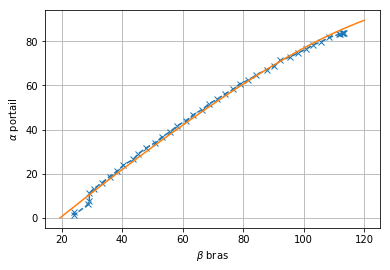

In [19]:
# Tracé de la courbe expérimentale
beta_exp,alpha_exp=np.loadtxt("mesures_portail_ouverture.txt",unpack=True, usecols=(0,1))
plt.plot(beta_exp*180/pi,alpha_exp*180/pi,'x--')
plt.grid(True)
plt.xlabel(r"$\beta$ bras")
plt.ylabel(r"$\alpha$ portail")

# tracé de la courbe théorique
n = 101
## A COMPLETER

beta = [beta0]
alpha = [0]
for i in range (n-1):
    beta.append(beta0 + (beta1 - beta0) / (n-1) * i)
    alpha.append(mon_newton2(lambda v:fermeture(v,beta[-1]), alpha[-1]))
    
plt.plot(np.array(beta) * 180 / pi, np.array(alpha) * 180 / pi)